#Airlines Flights Dataset for Different Cities
The Flights Booking Dataset of various Airlines is a scraped datewise from a famous website in a structured format. The dataset contains the records of flight travel details between the cities in India. Here, multiple features are present like Source & Destination City, Arrival & Departure Time, Duration & Price of the flight etc.

#### 1- Import Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math
import warnings
warnings.filterwarnings('ignore')

#### 2-Read Data

In [2]:
df=pd.read_excel('/content/airlines_flights_data.xlsx')
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.nunique()

,0
index,300153
airline,6
flight,1561
source_city,6
departure_time,6
stops,3
arrival_time,6
destination_city,6
class,2
duration,476


In [8]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [10]:
df.describe(include='object')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


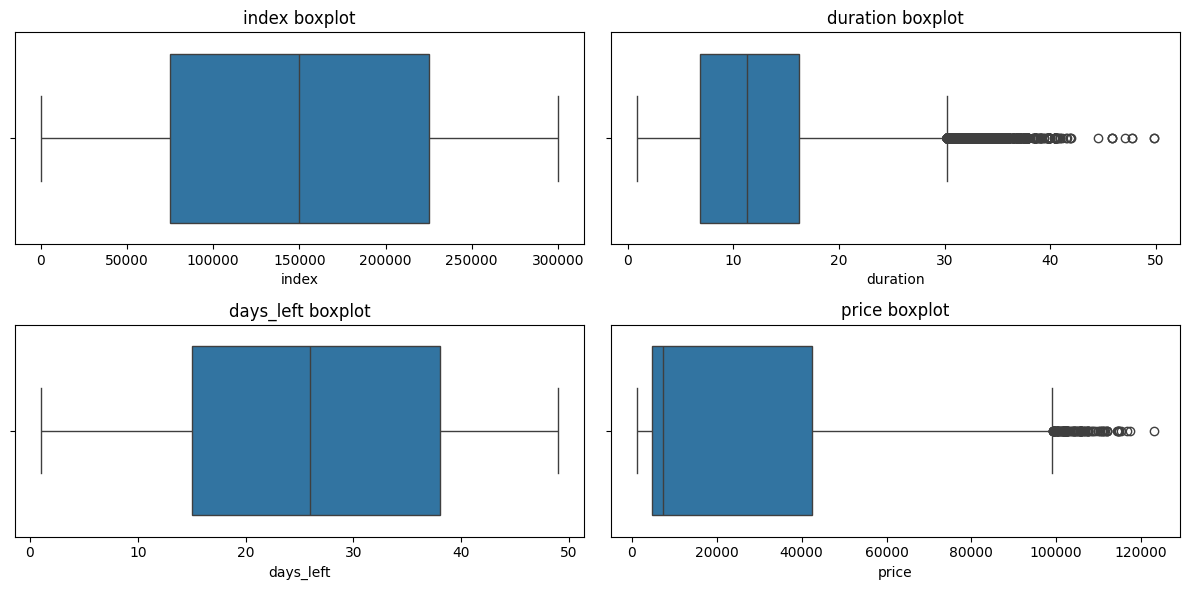

In [11]:
#show outlier
num_cols = df.select_dtypes("number").columns
n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)
plt.figure(figsize=(12, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.tight_layout()
plt.show()

In [12]:
#Remove outlier
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

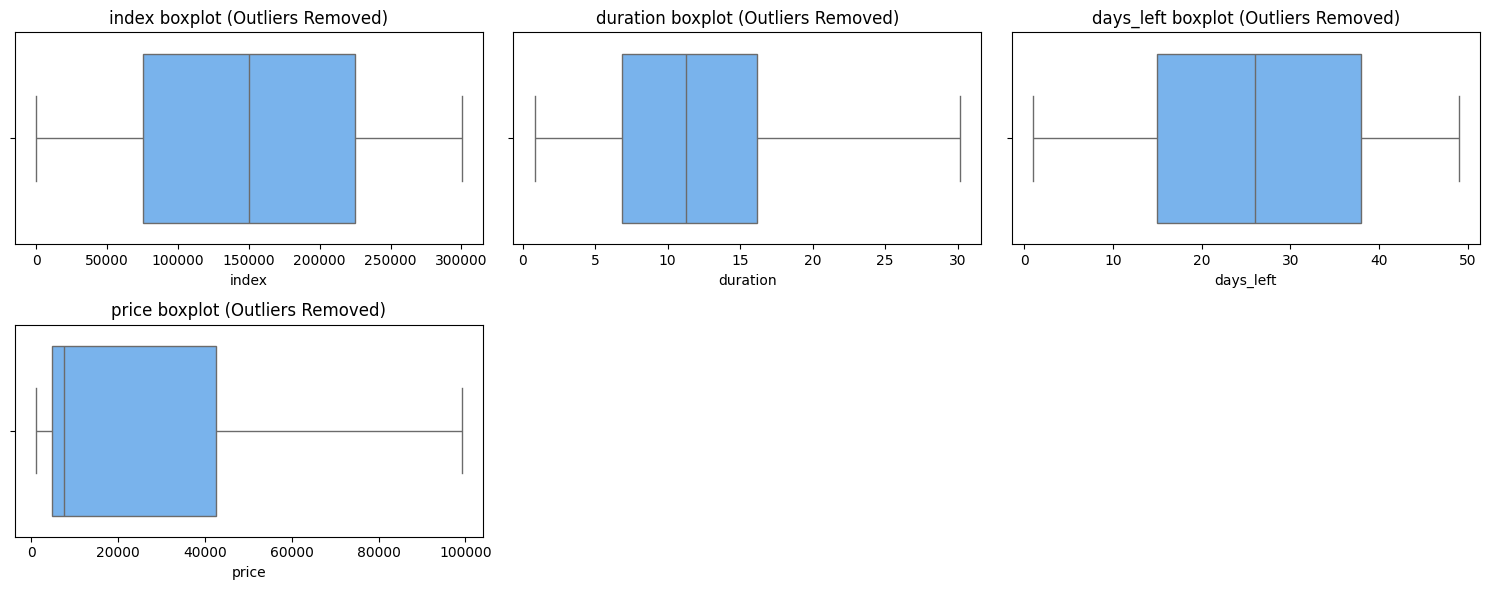

In [13]:
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series >= lower_bound) & (series <= upper_bound)]
num_cols = df.select_dtypes("number").columns
cols_per_row = 3
n_rows = math.ceil(len(num_cols) / cols_per_row)

plt.figure(figsize=(cols_per_row * 5, n_rows * 3))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, cols_per_row, i+1)
    cleaned_data = remove_outliers(df[col].dropna())  # Remove NaN and outliers
    sns.boxplot(x=cleaned_data, orient="h", color="#66b3ff")
    plt.title(f"{col} boxplot (Outliers Removed)")

plt.tight_layout()
plt.show()


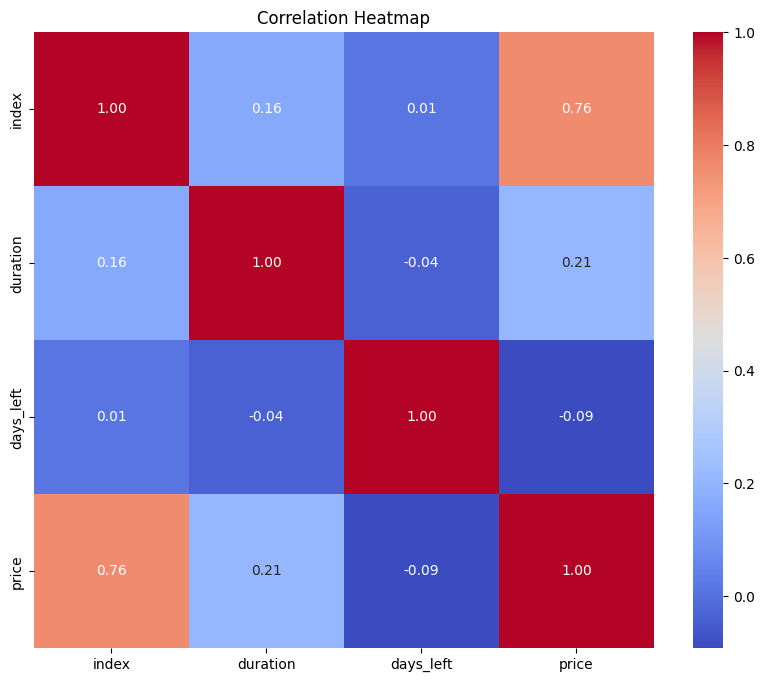

In [14]:
numeric_cols = df.select_dtypes("number").columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
#Q.1. What are the airlines in the dataset, accompanied by their frequencies?
airline_counts = df['airline'].value_counts()
airline_counts

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Vistara'),
  Text(1, 0, 'Air_India'),
  Text(2, 0, 'Indigo'),
  Text(3, 0, 'GO_FIRST'),
  Text(4, 0, 'AirAsia'),
  Text(5, 0, 'SpiceJet')])

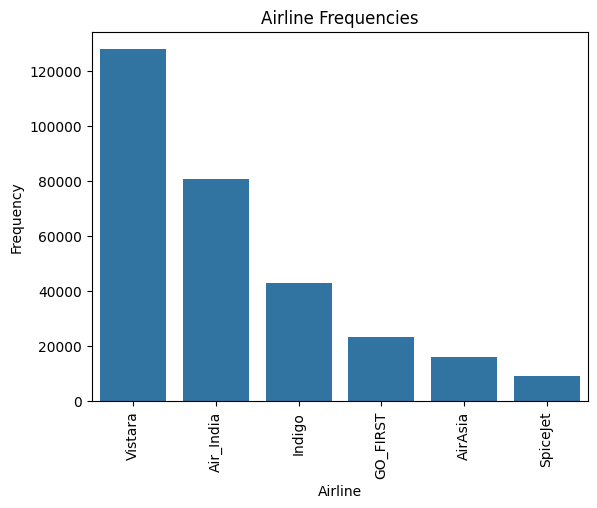

In [16]:
sns.barplot(x=airline_counts.index, y=airline_counts.values)
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.title('Airline Frequencies')
plt.xticks(rotation=90)

#### The Hightest Freq is Vistara	 and Lowest is SpiceJet

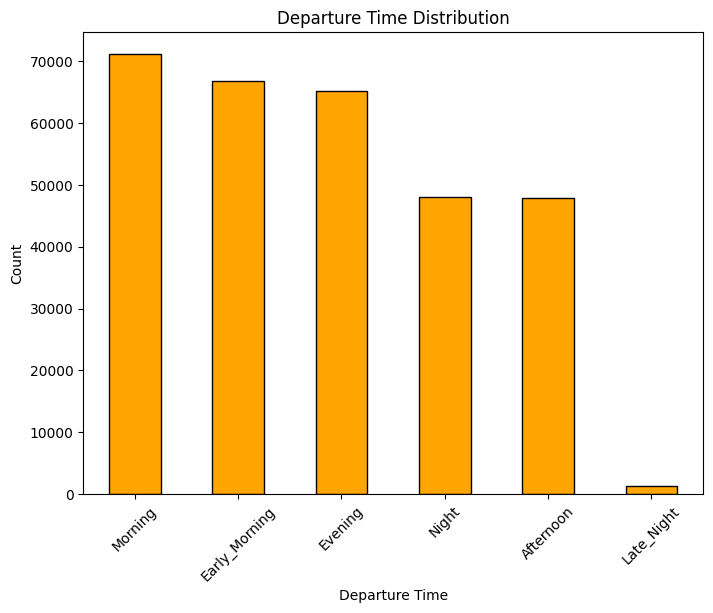

In [17]:
# Departure Time
plt.figure(figsize=(8,6))
df['departure_time'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title("Departure Time Distribution")
plt.xlabel("Departure Time")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Highest Departure Time is Morning And Lowest is Late_Night





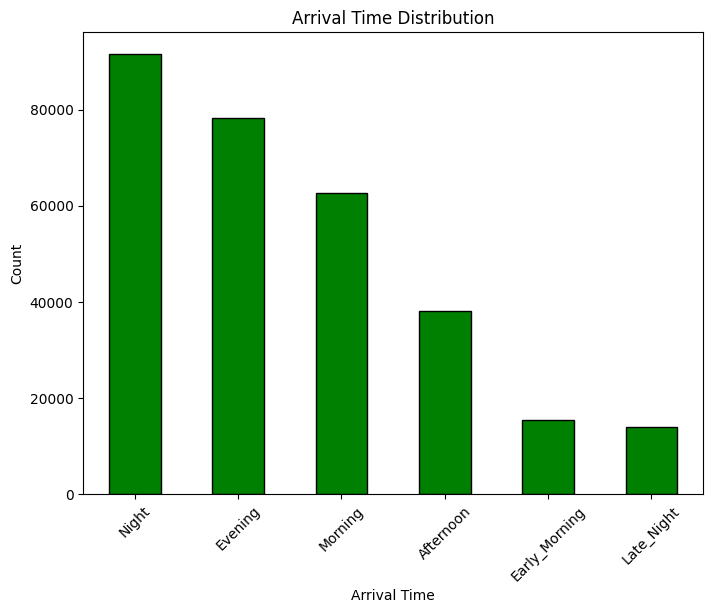

In [18]:
# Arrival Time
plt.figure(figsize=(8,6))
df['arrival_time'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title("Arrival Time Distribution")
plt.xlabel("Arrival Time")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Highest Arrival Time is Morning And Lowest is Late_Night


In [19]:
#Source City
fig=px.bar(df['source_city'].value_counts())
fig.show()

In [20]:
#Destination City.
fig=px.bar(df['destination_city'].value_counts())
fig.show()

In [21]:
#Q.4. Does price varies with airlines ?
airline_price = df.groupby('airline')['price'].mean().sort_values(ascending=False)
airline_price

,price
airline,
Vistara,30391.234610
Air_India,23507.019112
SpiceJet,6179.278881
GO_FIRST,5652.007595
Indigo,5324.216303
AirAsia,4091.072742


In [22]:
fig=px.bar(x=airline_price.index, y=airline_price.values, color=airline_price)
fig.show()

#### Highest Airplane In the Price is Vistara And Lowest is AirAsia

In [23]:
#Q.5 Does ticket price change based on the departure time?
ticket_price_departure = df.groupby('departure_time')['price'].mean().sort_values(ascending=False)
ticket_price_departure

,price
departure_time,
Night,23060.632427
Morning,21627.469499
Evening,21228.858530
Early_Morning,20368.887813
Afternoon,18178.712161
Late_Night,9295.299387


In [24]:
fig=px.bar(x=ticket_price_departure.index, y=ticket_price_departure.values, color=ticket_price_departure)
fig.show()

#### Highest ticket price  based on the departure time is in the Night and Lowest in in Late_Night

In [25]:
#Q.6 Does ticket price change based on the arrival time?
ticket_price_arrival = df.groupby('arrival_time')['price'].mean().sort_values(ascending=False)
ticket_price_arrival

,price
arrival_time,
Evening,23041.107389
Morning,22229.679493
Night,21583.673873
Afternoon,18493.493484
Early_Morning,14992.485698
Late_Night,11284.906078


In [26]:
fig=px.bar(x=ticket_price_arrival.index, y=ticket_price_arrival.values, color=ticket_price_arrival)
fig.show()

Highest ticket price based on the Arrival time is in the Evening and Lowest in in Late_Night

In [27]:
#Q.7. How the price changes with change in Source and Destination?
source_destination_price = df.groupby(['source_city', 'destination_city'])['price'].mean().sort_values(ascending=False)
source_destination_price

source_city  destination_city
Chennai      Bangalore           25079.241799
Kolkata      Chennai             23660.361040
Bangalore    Kolkata             23499.458915
             Chennai             23321.850078
Mumbai       Bangalore           23141.695925
Bangalore    Mumbai              23127.972718
Mumbai       Chennai             22777.597828
Chennai      Mumbai              22756.442707
Kolkata      Bangalore           22741.486665
Chennai      Kolkata             22667.682371
Mumbai       Kolkata             22379.005396
Kolkata      Mumbai              22076.106828
Hyderabad    Chennai             21848.065989
Chennai      Hyderabad           21591.345404
Kolkata      Hyderabad           21492.971761
Hyderabad    Bangalore           21347.177998
Bangalore    Hyderabad           21226.121192
Mumbai       Hyderabad           21003.994269
Hyderabad    Kolkata             20823.893201
Delhi        Kolkata             20557.308111
Hyderabad    Mumbai              20079.127484
Kolkata      Delhi               19412.826575
Delhi        Chennai             19367.994341
             Mumbai              19355.829812
Chennai      Delhi               18981.398344
Mumbai       Delhi               18724.488824
Delhi        Bangalore           17880.216315
Bangalore    Delhi               17722.386740
Delhi        Hyderabad           17345.011578
Hyderabad    Delhi               17243.945685
Name: price, dtype: float64

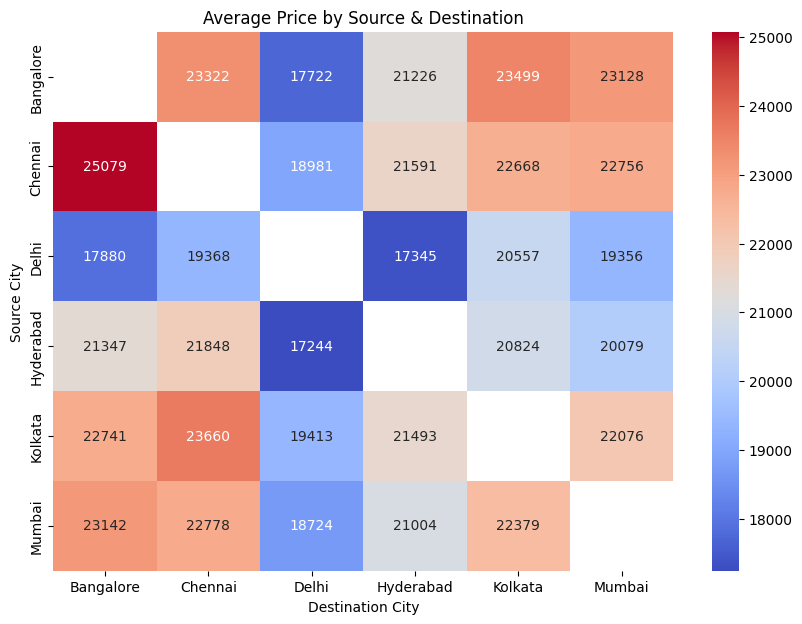

In [28]:
pivot = df.pivot_table(values='price', index='source_city', columns='destination_city', aggfunc='mean')
plt.figure(figsize=(10,7))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Average Price by Source & Destination")
plt.xlabel("Destination City")
plt.ylabel("Source City")
plt.show()

In [29]:
#Q.8 How is the price affected when tickets are bought in just 1 or 2 days before departure?
subset = df[df['days_left'] <= 2]
days_price = subset.groupby('days_left')['price'].mean().sort_values(ascending=False)
days_price

,price
days_left,
2,30185.160954
1,21558.333679


In [30]:
fig=px.bar(x=days_price.index, y=days_price.values, color=days_price)
fig.show()

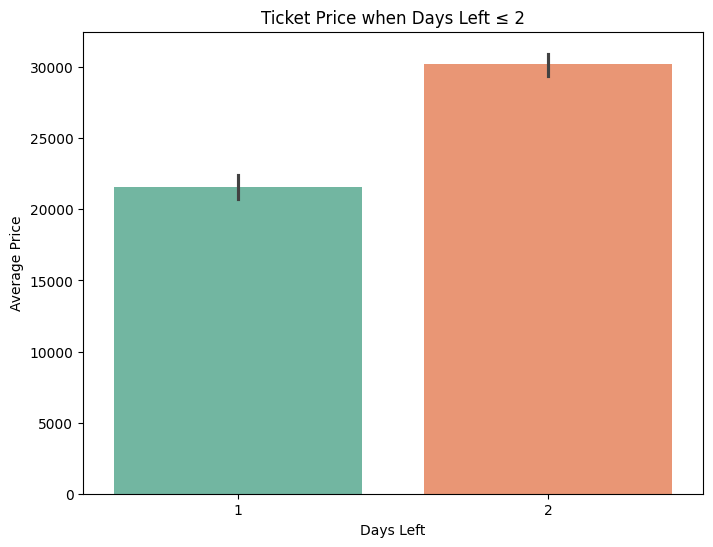

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(x='days_left', y='price', data=subset, palette="Set2")
plt.title("Ticket Price when Days Left ≤ 2")
plt.xlabel("Days Left")
plt.ylabel("Average Price")
plt.show()

In [32]:
#Q.9. How does the ticket price vary between Economy and Business class?
class_price = df.groupby('class')['price'].mean().sort_values(ascending=False)
class_price

,price
class,
Business,52532.830180
Economy,6572.342383


In [33]:
#use pie chart
fig=px.pie(class_price, values=class_price.values, names=class_price.index, hole=0.5)
fig.show()

In [34]:
#Q.10. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?
subset = df[(df['airline'] == 'Vistara') & (df['source_city'] == 'Delhi') & (df['destination_city'] == 'Hyderabad') & (df['class'] == 'Business')]
avg_price = subset['price'].mean()
avg_price

np.float64(47927.04638554217)

In [35]:
#Q.11. Which route (Source → Destination) has the highest average ticket price?
route_price = df.groupby(['source_city', 'destination_city'])['price'].mean().sort_values(ascending=False)
route_price

source_city  destination_city
Chennai      Bangalore           25079.241799
Kolkata      Chennai             23660.361040
Bangalore    Kolkata             23499.458915
             Chennai             23321.850078
Mumbai       Bangalore           23141.695925
Bangalore    Mumbai              23127.972718
Mumbai       Chennai             22777.597828
Chennai      Mumbai              22756.442707
Kolkata      Bangalore           22741.486665
Chennai      Kolkata             22667.682371
Mumbai       Kolkata             22379.005396
Kolkata      Mumbai              22076.106828
Hyderabad    Chennai             21848.065989
Chennai      Hyderabad           21591.345404
Kolkata      Hyderabad           21492.971761
Hyderabad    Bangalore           21347.177998
Bangalore    Hyderabad           21226.121192
Mumbai       Hyderabad           21003.994269
Hyderabad    Kolkata             20823.893201
Delhi        Kolkata             20557.308111
Hyderabad    Mumbai              20079.127484
Kolkata      Delhi               19412.826575
Delhi        Chennai             19367.994341
             Mumbai              19355.829812
Chennai      Delhi               18981.398344
Mumbai       Delhi               18724.488824
Delhi        Bangalore           17880.216315
Bangalore    Delhi               17722.386740
Delhi        Hyderabad           17345.011578
Hyderabad    Delhi               17243.945685
Name: price, dtype: float64

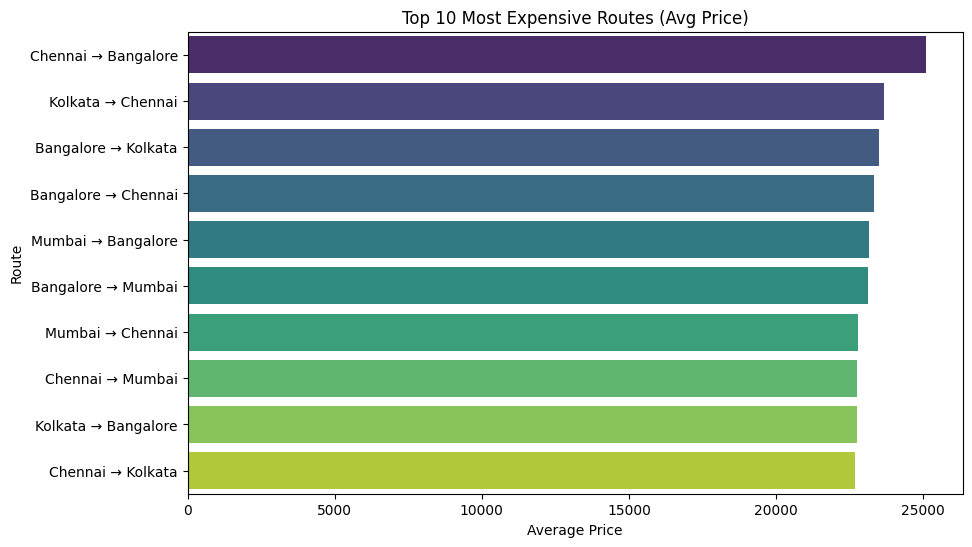

In [36]:
df['Route'] = df['source_city'] + " → " + df['destination_city']
route_prices = df.groupby('Route')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=route_prices.values[:10], y=route_prices.index[:10], palette="viridis")
plt.title("Top 10 Most Expensive Routes (Avg Price)")
plt.xlabel("Average Price")
plt.ylabel("Route")
plt.show()

#### The route from Chennai to	Bangalore has the highest average ticket price And The Lowest is  from Chennai	to Kolkata

In [37]:
# Q.12. Which airline has the longest average flight duration?
airline_duration = df.groupby('airline')['duration'].mean().sort_values(ascending=False)
airline_duration

,duration
airline,
Air_India,15.447744
Vistara,13.312912
SpiceJet,12.579767
AirAsia,8.941714
GO_FIRST,8.755380
Indigo,5.795197


In [38]:
fig=px.bar(x=airline_duration.index, y=airline_duration.values, color=airline_duration)
fig.show()

#### The airline With the longest average flight duration is Air_India And Lowest is Indigo

In [39]:
# Q.13. Which airline provides the cheapest flights on average?
airline_price = df.groupby('airline')['price'].mean().sort_values(ascending=False)
airline_price

,price
airline,
Vistara,30391.234610
Air_India,23507.019112
SpiceJet,6179.278881
GO_FIRST,5652.007595
Indigo,5324.216303
AirAsia,4091.072742


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Vistara'),
  Text(1, 0, 'Air_India'),
  Text(2, 0, 'SpiceJet'),
  Text(3, 0, 'GO_FIRST'),
  Text(4, 0, 'Indigo'),
  Text(5, 0, 'AirAsia')])

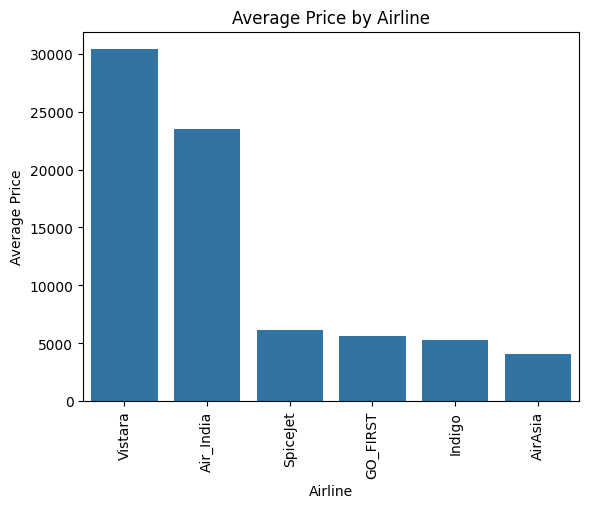

In [40]:
sns.barplot(x=airline_price.index, y=airline_price.values)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Price by Airline')
plt.xticks(rotation=90)

#### The airline provides the cheapest flights on average is Vistara And The Lowest is AirAsia

In [41]:
# Q.14. How does number of stops affect ticket price?
stop_price = df.groupby('stops')['price'].mean().sort_values(ascending=False)
stop_price

,price
stops,
one,22898.940366
two_or_more,14101.177028
zero,9375.938535


In [42]:
#use pie chart
fig=px.pie(stop_price, values=stop_price.values, names=stop_price.index, hole=0.5)
fig.show()

In [43]:
# Q.15. Which city is the most common Source?
source_city_counts = df['source_city'].value_counts()
most_common_source = source_city_counts.idxmax()
most_common_source

'Delhi'

In [44]:
fig=px.bar(x=source_city_counts.index, y=source_city_counts.values, color=source_city_counts)
fig.show()

#### City With the most common Source is Delhi and Least is Chennai

In [45]:
#Q.15. Which city is the most common destination?
destination_city_counts = df['destination_city'].value_counts()
most_common_destination = destination_city_counts.idxmax()
most_common_destination

'Mumbai'

In [46]:
fig=px.bar(x=destination_city_counts.index, y=destination_city_counts.values, color=destination_city_counts)
fig.show()

City With the most common Destination is Mumbai and Least is Chennai

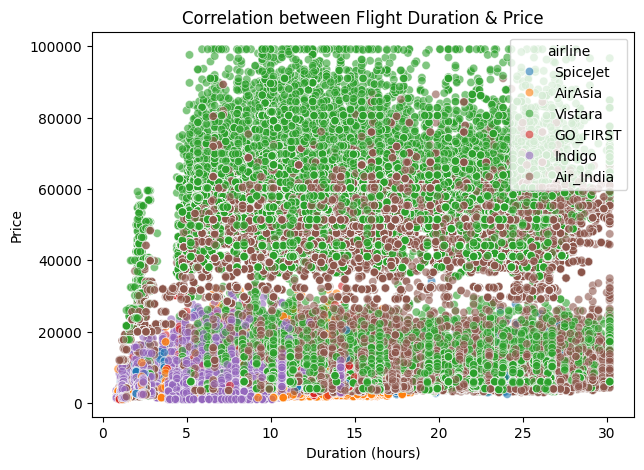

In [47]:
# Q.16. Correlation between flight duration and price
plt.figure(figsize=(7,5))
sns.scatterplot(x='duration', y='price', hue='airline', data=df, alpha=0.6)
plt.title("Correlation between Flight Duration & Price")
plt.xlabel("Duration (hours)")
plt.ylabel("Price")
plt.show()

In [48]:
#Q.17. Airline dominance by Class
class_dominance = df.groupby(['airline', 'class']).size().unstack(fill_value=0)
class_dominance

class,Business,Economy
airline,,
AirAsia,0,16098
Air_India,32898,47994
GO_FIRST,0,23173
Indigo,0,43120
SpiceJet,0,9011
Vistara,60589,67270


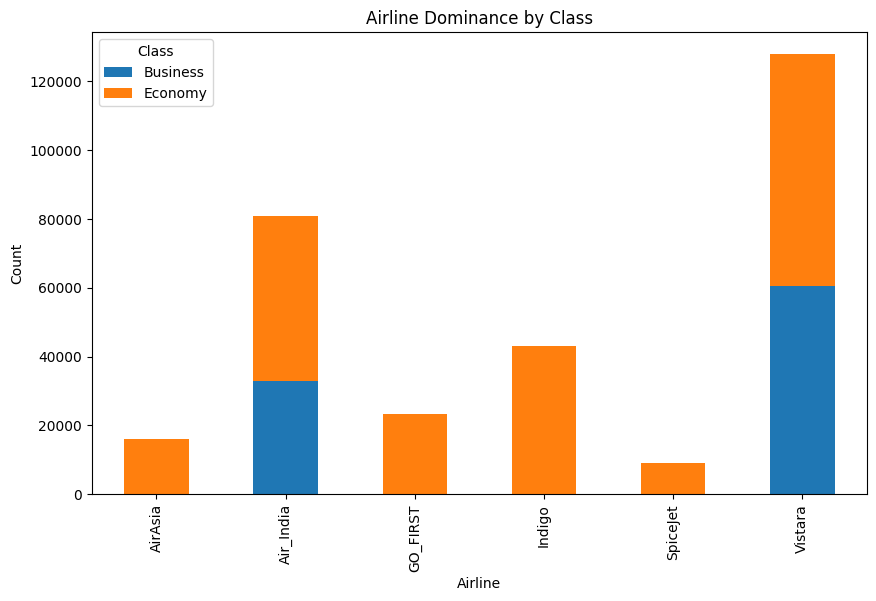

In [49]:
#use bar
class_dominance.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Airline Dominance by Class")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.legend(title="Class")

In [70]:
# Q.18. Are evening flights more expensive than morning flights?
subset = df[df['departure_time'].isin(['Evening', 'Morning'])]
evening_morning_price = subset.groupby('departure_time')['price'].mean().sort_values(ascending=False)
evening_morning_price


,price
departure_time,
Morning,21627.469499
Evening,21228.858530


In [71]:
#use pie chart
fig=px.pie(evening_morning_price, values=evening_morning_price.values, names=evening_morning_price.index, hole=0.5)
fig.show()

#### Morning Flights is More Expensive than Evening Flights

Text(0, 0.5, 'Price')

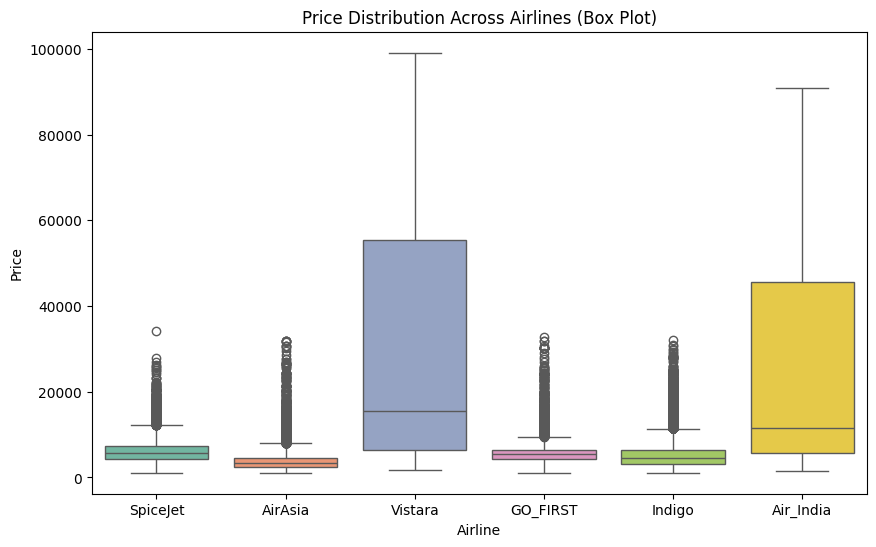

In [52]:
# Q.19. Price distribution across airlines (Box Plot)
plt.figure(figsize=(10,6))
sns.boxplot(x='airline', y='price', data=df, palette="Set2")
plt.title("Price Distribution Across Airlines (Box Plot)")
plt.xlabel("Airline")
plt.ylabel("Price")

In [53]:
# Q.20. Which airline has the most variability in ticket prices?
airline_price_var = df.groupby('airline')['price'].var().sort_values(ascending=False)
airline_price_var

,price
airline,
Vistara,6.564847e+08
Air_India,4.370239e+08
Indigo,1.068567e+07
SpiceJet,8.997783e+06
AirAsia,7.975288e+06
GO_FIRST,6.319520e+06


In [54]:
fig=px.bar(x=airline_price_var.index, y=airline_price_var.values, color=airline_price_var)
fig.show()

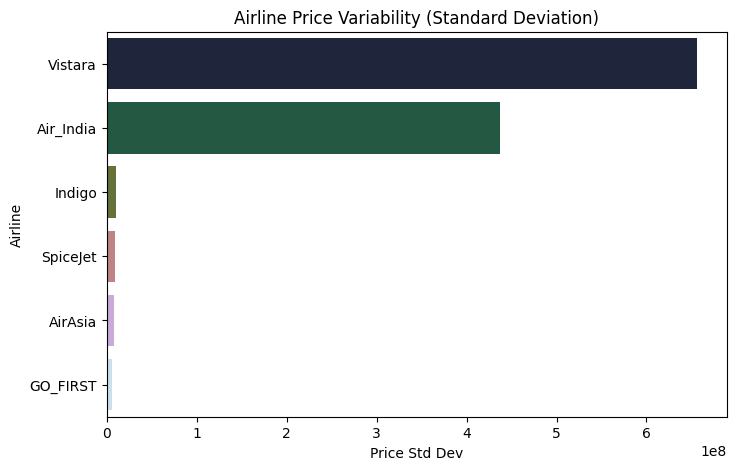

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x=airline_price_var.values, y=airline_price_var.index, palette="cubehelix")
plt.title("Airline Price Variability (Standard Deviation)")
plt.xlabel("Price Std Dev")
plt.ylabel("Airline")
plt.show()

#### The Airline has the most variability in ticket prices is Vistara

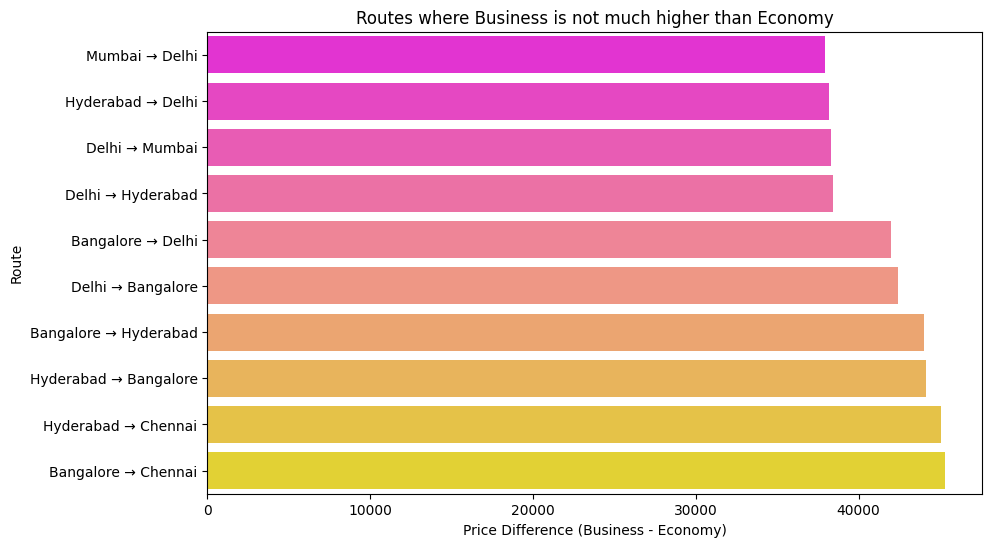

In [73]:
# Q.21. Routes where Business class is close to Economy
avg_prices_class = df.groupby(['Route', 'class'])['price'].mean().unstack()
avg_prices_class['Difference'] = avg_prices_class['Business'] - avg_prices_class['Economy']
close_gap = avg_prices_class.sort_values('Difference').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=close_gap['Difference'], y=close_gap.index, palette="spring")
plt.title("Routes where Business is not much higher than Economy")
plt.xlabel("Price Difference (Business - Economy)")
plt.ylabel("Route")
plt.show()

#### The Routes where Business class is close to Economy with Low Price Difference (Business - Economy) is Mumbai -> Delhi and high Price Difference (Business - Economy) is Bangalore -> Chennai

####Numerical Data Distribution Graphs

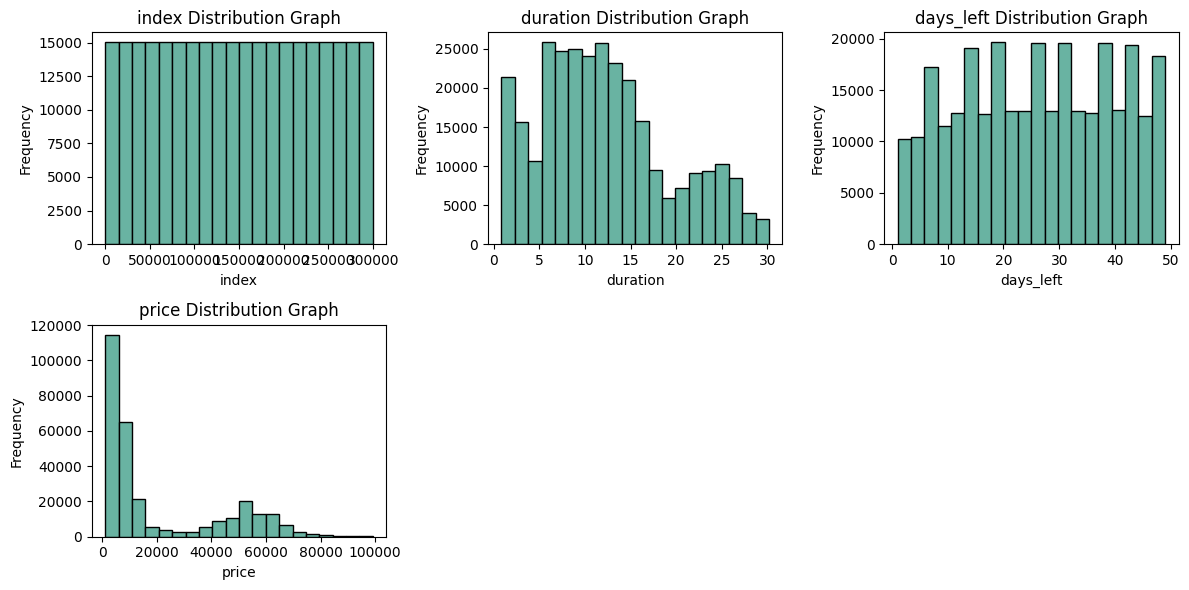

In [57]:
#hist
num_cols = df.select_dtypes("number").columns
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)
plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.hist(df[col], bins=20, edgecolor="black", color="#69b3a2")
    plt.title(f"{col} Distribution Graph")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

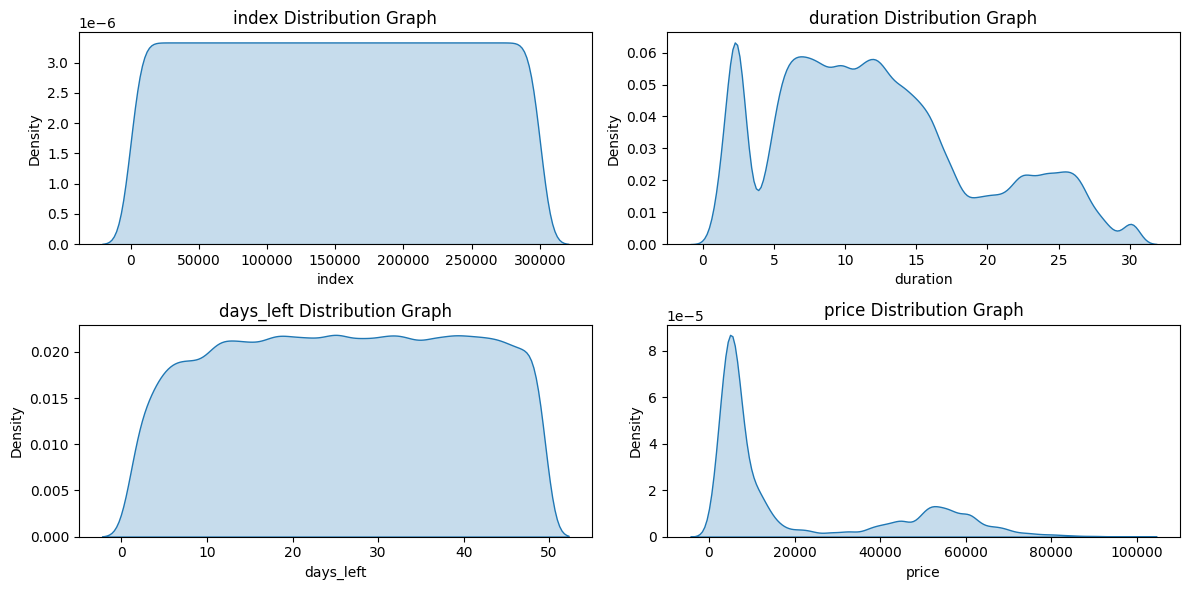

In [58]:
#Kdeplot
num_cols = df.select_dtypes("number").columns
n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)
plt.figure(figsize=(12, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.kdeplot(df[col], fill=True)
    plt.title(f"{col} Distribution Graph")
plt.tight_layout()
plt.show()

#### Categorical Data Distribution Graphs

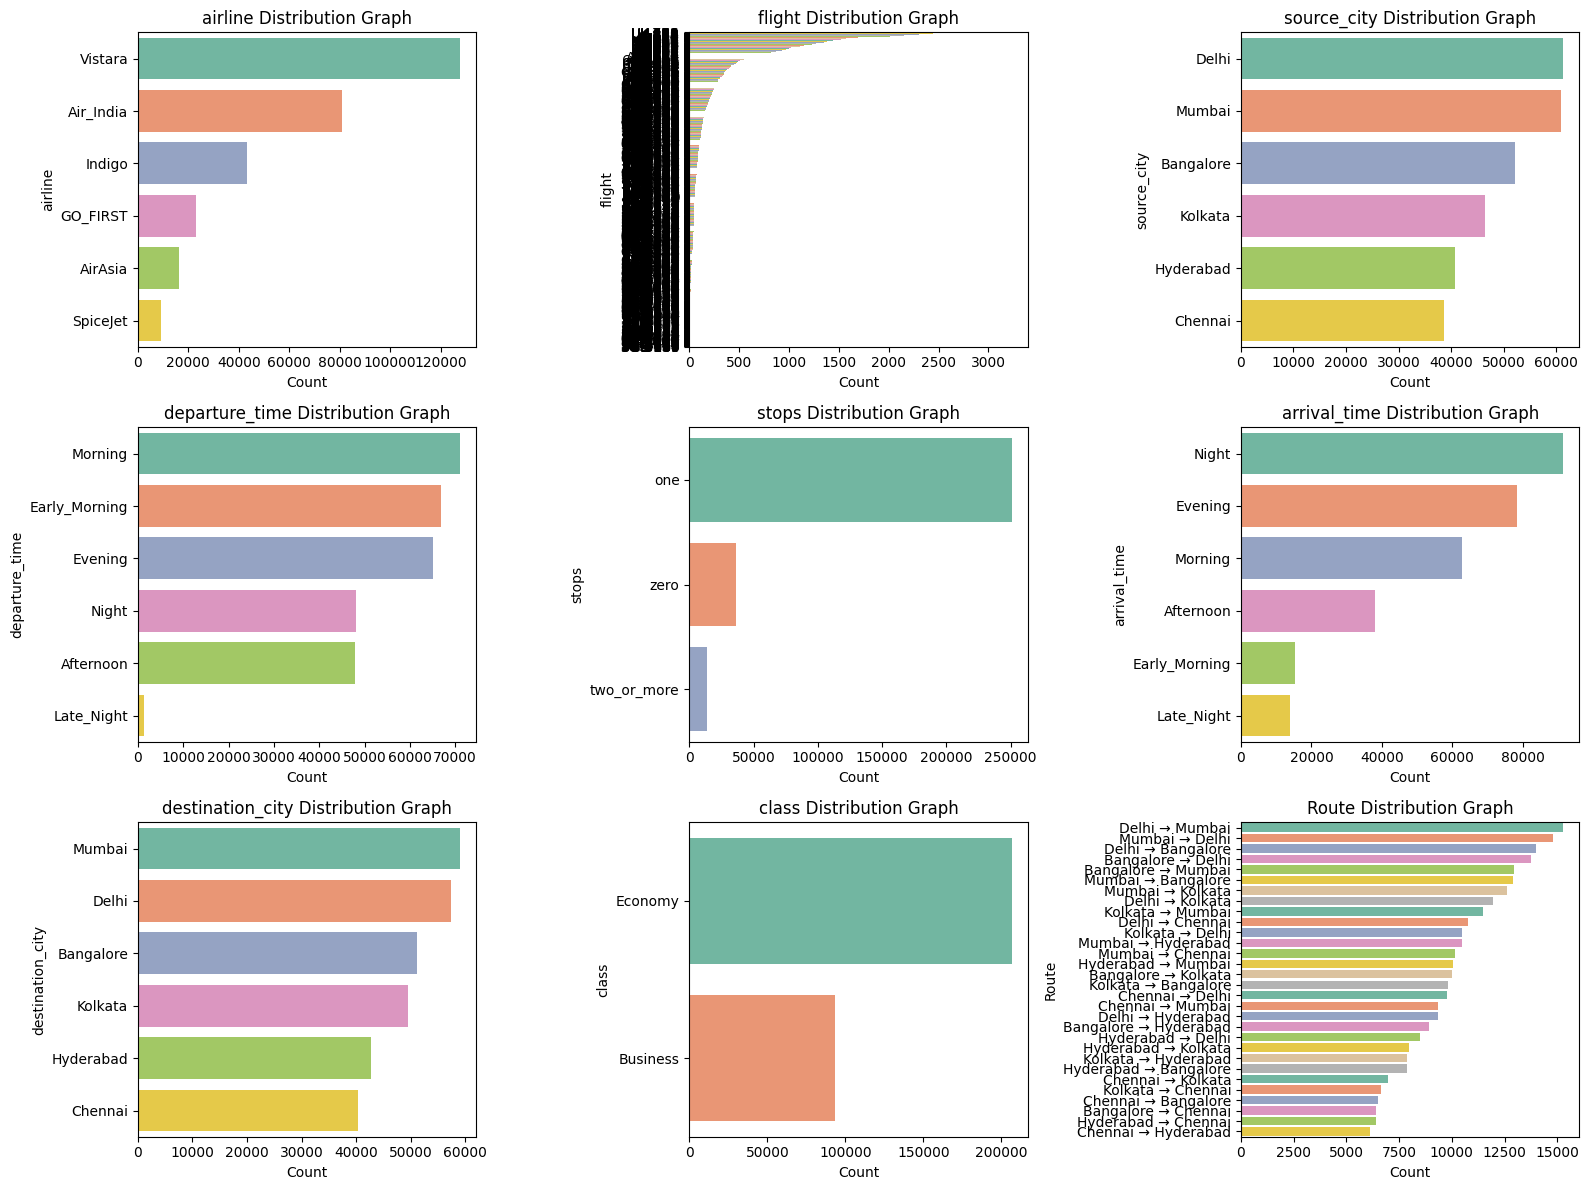

In [59]:
# Select only categorical/object columns
cat_cols = df.select_dtypes(include=["category", "object"]).columns

# Drop columns that are not relevant or might cause issues
cat_cols = cat_cols.drop(["Flight"], errors="ignore")   # flight codes are too many unique values

# Plot distributions
rows = math.ceil(len(cat_cols) / 3)
plt.figure(figsize=(16, 4 * rows))

for i, col in enumerate(cat_cols):
    plt.subplot(rows, 3, i + 1)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set2")
    plt.title(f"{col} Distribution Graph")
    plt.xlabel("Count")
    plt.ylabel(col)

plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.tight_layout()
plt.show()


#### B. Outlier Detection Graphs

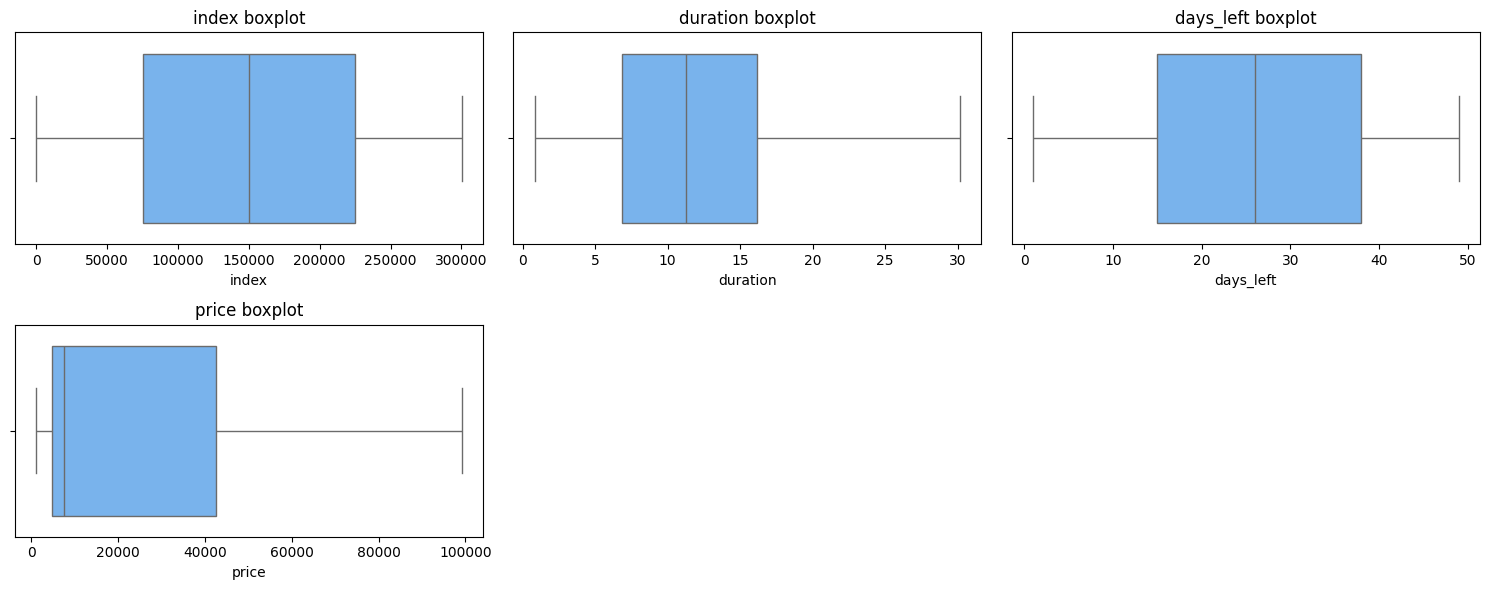

In [60]:
num_cols = df.select_dtypes("number").columns
cols_per_row = 3
n_rows = math.ceil(len(num_cols) / cols_per_row)
plt.figure(figsize=(cols_per_row * 5, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, cols_per_row, i+1)
    sns.boxplot(x=df[col], orient="h", color="#66b3ff")
    plt.title(f"{col} boxplot")
plt.tight_layout()
plt.show()

#### Numerical/Numerical Relationship

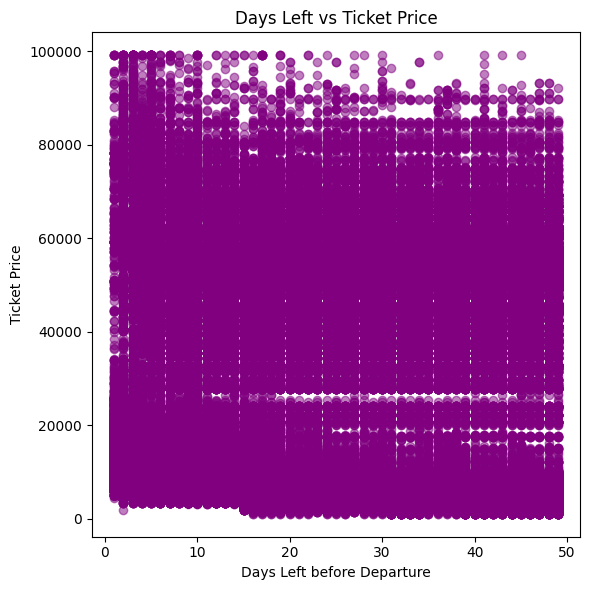

In [61]:
plt.figure(figsize=(6, 6))
plt.scatter(df["days_left"], df["price"], alpha=0.5, color="purple")
plt.xlabel("Days Left before Departure")
plt.ylabel("Ticket Price")
plt.title("Days Left vs Ticket Price")
plt.tight_layout()
plt.show()


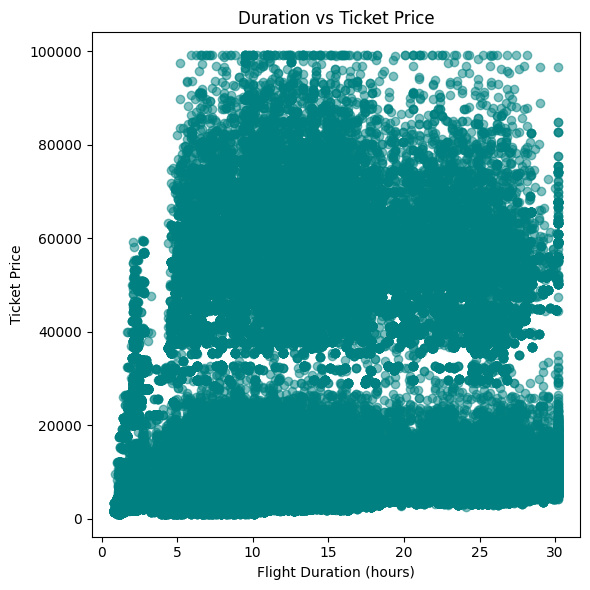

In [62]:
plt.figure(figsize=(6, 6))
plt.scatter(df["duration"], df["price"], alpha=0.5, color="teal")
plt.xlabel("Flight Duration (hours)")
plt.ylabel("Ticket Price")
plt.title("Duration vs Ticket Price")
plt.tight_layout()
plt.show()


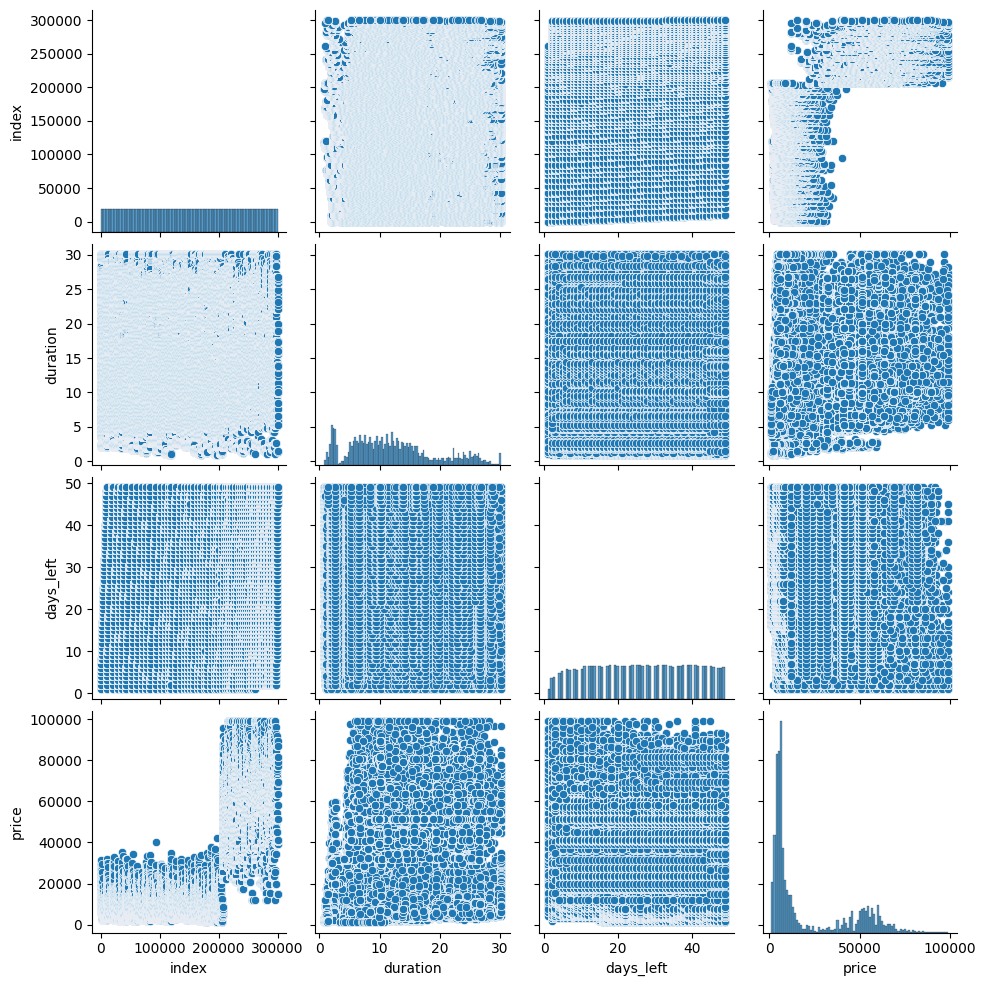

In [63]:
# Pair Plot
sns.pairplot(df)

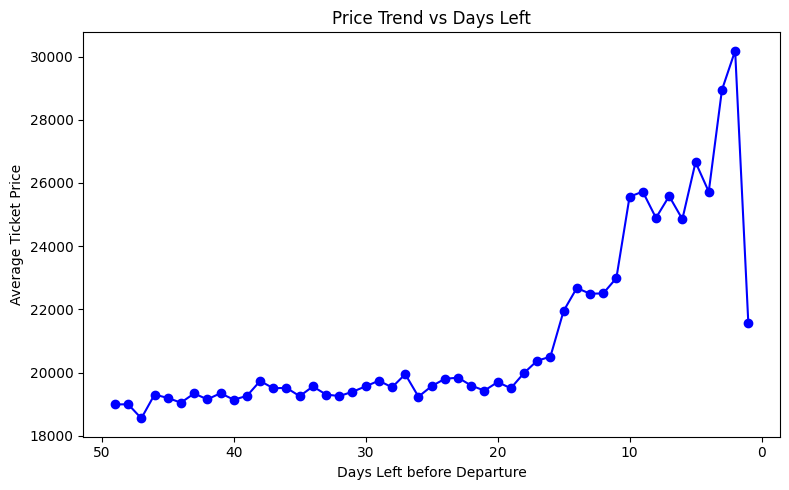

In [64]:
# Group by days left before departure
days_price = df.groupby("days_left")["price"].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(days_price["days_left"], days_price["price"], color="blue", marker="o")
plt.xlabel("Days Left before Departure")
plt.ylabel("Average Ticket Price")
plt.title("Price Trend vs Days Left")
plt.gca().invert_xaxis()  # so 0 (last-minute) appears on the right
plt.tight_layout()
plt.show()

#### 11 - Data Splitting

In [65]:
#split data
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 12- Normalization

In [66]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

#### 13-Encoding

In [67]:
#Encoding
from sklearn.preprocessing import OneHotEncoder
cat_cols = X.select_dtypes(include=["category", "object"]).columns

# Convert all categorical columns to string type explicitly
for col in cat_cols:
    X[col] = X[col].astype(str)

# Drop 'flight' and 'Route' columns before encoding
cat_cols_to_encode = cat_cols.drop(['flight', 'Route'], errors='ignore')

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(X[cat_cols_to_encode]))
encoded_cols.columns = encoder.get_feature_names_out(cat_cols_to_encode)
X = pd.concat([X.drop(cat_cols_to_encode, axis=1), encoded_cols], axis=1)

In [68]:
!pip install ydata_profiling

In [69]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Airlines Flights Data Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:06<00:00,  1.98it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##Conclusion & Recommendations

###Conclusion

The analysis of the Airlines Flights dataset reveals that airline ticket pricing is multi-dimensional and influenced by several key factors:

Booking Time (Days Left): Prices rise significantly as the departure date approaches, confirming the premium charged for last-minute travel.

Flight Timing: Evening and night departures are generally more expensive than morning flights.

Stops & Duration: Non-stop flights are priced higher, with longer durations adding to costs.

Airline & Class: Business Class fares are substantially higher than Economy, though some routes show smaller gaps, and premium airlines exhibit greater variability in prices.

Routes & Cities: Heavily traveled routes (Delhi–Mumbai, Bangalore–Hyderabad) see both competition and premium pricing, reflecting demand patterns.

####Recommendations
For Airlines:

Dynamic Pricing Optimization: Use demand forecasting models to refine last-minute pricing, ensuring competitiveness without losing revenue.

Route Strategy: Expand capacity on high-demand routes and offer promotional pricing on less-traveled routes to balance load factors.

Class Differentiation: Highlight added value in Business Class on routes with small price gaps, encouraging Economy passengers to upgrade.

Time-based Promotions: Introduce discounts for early morning or off-peak flights to increase utilization of lower-demand slots.

For Travel Agencies / Platforms:

Fare Recommendation Systems: Incorporate booking lead time, departure timing, and stops into AI-powered fare suggestion tools for customers.

Customer Education: Clearly communicate the benefits of early booking and flexible travel times to help customers save.

Bundled Offers: Promote non-stop flights with add-ons (luggage, meals, seat selection) as premium packages to capture value-conscious travelers.

For Travelers:

Book Early: Purchase tickets at least 15–20 days before departure to avoid last-minute premiums.

Choose Timing Wisely: Opt for morning or mid-day departures where fares are consistently lower.

Look for Smart Upgrades: On routes where Business and Economy fares are close, upgrading can provide added comfort at marginal extra cost.